<a href="https://colab.research.google.com/github/SlavaKulik/neural_networks/blob/main/neural_networks_4_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train data size:  331
Test data size:  111


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


DecisionTree score:  0.1291285649290277
MLPRegressor score:  0.24130269333306986


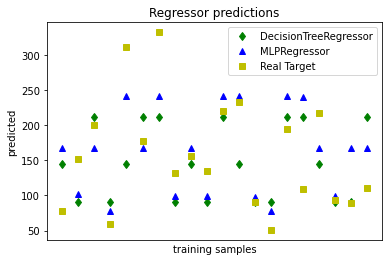

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
 
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

print("Train data size: ", y_train.size)
print("Test data size: ", y_test.size)

tree = DecisionTreeRegressor(min_samples_leaf=100)
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(activation='tanh', solver='lbfgs', hidden_layer_sizes=(5, 5), tol=1e-2, max_iter=500, random_state=0),
)

tree.fit(X_train, y_train)
mlp.fit(X_train, y_train)

print("DecisionTree score: ", tree.score(X_test, y_test))
print("MLPRegressor score: ", mlp.score(X_test, y_test))

pred_tr = tree.predict(X_test[:20])
pred_nn = mlp.predict(X_test[:20])
 
plt.figure()
plt.plot(pred_tr, "gd", label="DecisionTreeRegressor")
plt.plot(pred_nn, "b^", label="MLPRegressor")
plt.plot(y_test[:20], "ys", label="Real Target")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions")

plt.show()